In [1]:
import sys
import os
import importlib
import numpy as np
import pandas as pd
import yfinance as yf
from dateutil.relativedelta import relativedelta
from datetime import datetime
from matplotlib import pyplot as plt
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from scipy.stats import gmean

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# add utils path
src_path = os.path.abspath('../../')
if src_path not in sys.path:
    sys.path.append(src_path)

# import custom functions
from src.investing_strategies import pca_fa
from src.utils import daily_to_monthly

# reload module on change
importlib.reload(sys.modules['src.investing_strategies']) 

<module 'src.investing_strategies' from 'c:\\Users\\Yang\\Documents\\Projects\\funance_blog\\src\\investing_strategies\\__init__.py'>

In [2]:
# get data
DATA_START = '1994-12-31'
DATA_END = '2024-06-30'
PATH = '../data/snp500.csv'

tickers = pd.read_csv(PATH)['ticker'].tolist()

factors_df = pd.read_csv('../data/fama_french_momentum_daily.csv')
factors_df['Date'] = pd.to_datetime(factors_df['Date'])
factors_df.set_index('Date', inplace=True)
factors_df = factors_df / 100 # convert to decimals

prices = yf.download(tickers, start=DATA_START, end=datetime.today().strftime('%Y-%m-%d'))['Adj Close']
market = yf.download('SPY', start=DATA_START, end=datetime.today().strftime('%Y-%m-%d'))['Adj Close']

returns_df = prices.pct_change(fill_method=None)[1:]
market_returns_df = market.pct_change(fill_method=None)[1:]

[*********************100%%**********************]  500 of 500 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# backtest strategy
start_date = datetime.strptime(DATA_START, '%Y-%m-%d')
end_date = datetime.strptime(DATA_END, '%Y-%m-%d')
backtest_start_date = start_date + relativedelta(years=5) # offset by 5 years
test_dates = pd.date_range(backtest_start_date, end_date, freq='ME')

portfolio_returns = np.array([])
market_returns = np.array([])
portfolios = []

for date in test_dates:
    print(f'Optimizing portfolio for {date.strftime("%Y-%m-%d")}...')

    train_start = (date - relativedelta(years=5)).strftime('%Y-%m-%d')
    train_end = date.strftime('%Y-%m-%d')

    historical_returns = returns_df[train_start:train_end]

    # portfolio allocation
    portfolio = pca_fa(historical_returns, factors_df, 1, 0.8)

    # holding period
    buy_date = date + relativedelta(days=1)
    sell_date = buy_date + relativedelta(months=1) - relativedelta(days=1)
    
    selected_stocks = list(portfolio.keys())
    portfolios.append(selected_stocks)
    
    print(f'Tickers selected: {selected_stocks}')
    
    # calculate actual returns
    weights = list(portfolio.values())
    stock_returns = daily_to_monthly(returns_df[selected_stocks][buy_date:sell_date])

    portfolio_returns = np.append(
        portfolio_returns,
        100*np.dot(stock_returns, weights)
    )

    # calculate market returns
    market_returns = np.append(
        market_returns,
        100*daily_to_monthly(market_returns_df[buy_date:sell_date]).iloc[0]
    )
    
    print(f'Portfolio returns: {portfolio_returns[-1]:.2f}%')
    print(f'Market returns: {market_returns[-1]:.2f}%')
    print()

Optimizing portfolio for 1999-12-31...
Tickers selected: ['PFE', 'HD', 'MSFT', 'JBL', 'QCOM', 'BBY', 'BIIB', 'INTU', 'ORCL']
Portfolio returns: -9.71%
Market returns: -4.98%

Optimizing portfolio for 2000-01-31...
Tickers selected: ['PFE', 'TER', 'JNJ', 'CSCO', 'AFL', 'COST', 'RVTY', 'BIIB', 'INTC', 'VMC', 'ADBE', 'JBL', 'TAP', 'BAX', 'MGM', 'SWKS', 'BBY', 'MOS', 'WMB', 'PAYX', 'MU', 'AAPL', 'BALL', 'TECH', 'APH', 'MNST', 'NKE', 'QCOM', 'MMM', 'BDX']
Portfolio returns: 12.70%
Market returns: -1.52%

Optimizing portfolio for 2000-02-29...
Tickers selected: ['APH', 'RVTY', 'INCY', 'VRTX', 'TER', 'BIIB', 'SWKS', 'QCOM', 'ORCL']
Portfolio returns: -14.64%
Market returns: 9.69%

Optimizing portfolio for 2000-03-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['JBL', 'EXC', 'COST', 'BBY', 'ADI', 'PAYX', 'INCY', 'WBA', 'BIIB', 'SCHW']
Portfolio returns: -0.89%
Market returns: -3.51%

Optimizing portfolio for 2000-04-30...
Tickers selected: ['BBY', 'REGN', 'DVN', 'UHS', 'MTCH', 'NVR', 'ROST', 'AES', 'ESS', 'QCOM', 'PNW', 'HSY']
Portfolio returns: 0.14%
Market returns: -1.57%

Optimizing portfolio for 2000-05-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['BKR', 'JCI', 'JBL', 'INCY', 'FAST', 'PNW', 'MTCH', 'ESS', 'AES', 'AMD', 'NOC', 'APH', 'CSCO', 'BBY', 'TJX', 'MNST', 'CHD', 'RVTY', 'BIIB', 'JKHY', 'SWKS', 'NVR', 'MGM', 'UHS']
Portfolio returns: 4.77%
Market returns: 1.97%

Optimizing portfolio for 2000-06-30...
Tickers selected: ['PFE', 'EXC', 'ADP', 'BBY', 'NTRS', 'COF', 'BIIB', 'SWKS', 'TECH', 'JCI', 'JBL', 'COO']
Portfolio returns: -1.51%
Market returns: -1.57%

Optimizing portfolio for 2000-07-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['APH', 'TAP', 'KIM', 'BBY', 'EXPD', 'CSCO', 'BIIB', 'NVR', 'PAYX', 'JBL', 'MNST', 'QCOM', 'SWKS', 'COO', 'DLTR']
Portfolio returns: 2.95%
Market returns: 6.53%

Optimizing portfolio for 2000-08-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['MNST', 'D', 'ADBE', 'BIIB', 'JBL', 'CTRA', 'BBY', 'NVR', 'COO', 'SWKS', 'QCOM', 'MGM', 'AFL', 'TER', 'FAST']
Portfolio returns: 6.09%
Market returns: -5.49%

Optimizing portfolio for 2000-09-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['IVZ', 'INCY', 'EXC', 'BBY', 'JKHY', 'ADBE', 'REGN', 'BIIB', 'SCHW', 'COF', 'JBL', 'ORCL']
Portfolio returns: 1.12%
Market returns: -0.47%

Optimizing portfolio for 2000-10-31...
Tickers selected: ['INCY', 'GLW', 'QCOM', 'COO', 'JKHY', 'VRTX', 'PPL', 'KR', 'ESS', 'FI', 'PFE', 'ORCL', 'OMC', 'BBY', 'JCI', 'JBL', 'NVR', 'WBA', 'AFL', 'BIIB', 'AMGN', 'EXC', 'MNST', 'GIS', 'SYY']
Portfolio returns: -3.38%
Market returns: -7.47%

Optimizing portfolio for 2000-11-30...
Tickers selected: ['JKHY', 'COF', 'COR', 'PAYX', 'TJX', 'AMGN', 'JNJ', 'JBL', 'PFE', 'LH', 'TECH', 'GIS', 'CSCO', 'WBA', 'BBY', 'COO', 'ESS', 'NTAP', 'ADP', 'MNST', 'OMC', 'NVR', 'QCOM']
Portfolio returns: 3.74%
Market returns: -0.52%

Optimizing portfolio for 2000-12-31...
Tickers selected: ['TAP', 'UHS', 'COR', 'OKE', 'MMM', 'NOC', 'TFC', 'PPL', 'COF', 'CVS', 'ROST', 'CB', 'CTRA', 'NTAP', 'ESS', 'AES', 'BMY', 'JCI', 'WM', 'REGN', 'COO', 'TFX']
Portfolio returns: -7.00%
Market returns: 4.45%

Optimizing por

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Tickers selected: ['SBUX', 'NTAP', 'APH', 'WAT', 'TGT', 'QCOM', 'BBY', 'REGN', 'MNST', 'TECH', 'COST', 'AES', 'JBL', 'DHR']
Portfolio returns: -16.28%
Market returns: -9.54%

Optimizing portfolio for 2001-02-28...
Tickers selected: ['JCI', 'LH', 'COR', 'MNST', 'PCAR', 'CAH', 'NVR', 'PPL', 'SBUX', 'CI', 'DVN', 'AES', 'TAP', 'FAST', 'COO', 'TFC', 'CVS', 'BIO', 'NOC', 'JBL', 'RMD', 'ROST', 'DOC', 'CHD', 'TGT', 'EXPD']
Portfolio returns: -2.20%
Market returns: -5.60%

Optimizing portfolio for 2001-03-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Tickers selected: ['SBUX', 'COF', 'ROST', 'TGT', 'COO', 'EXPD', 'BEN', 'LH', 'DVN', 'DRI', 'TJX', 'AES', 'PCAR', 'AMD', 'NVR', 'CNP']
Portfolio returns: 7.55%
Market returns: 8.54%

Optimizing portfolio for 2001-04-30...
Tickers selected: ['MDT', 'AIG', 'BRO', 'LLY', 'EXC', 'BMY', 'REGN', 'TAP', 'HD', 'ORCL', 'CPRT', 'WBA']
Portfolio returns: -0.57%
Market returns: -0.56%

Optimizing portfolio for 2001-05-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['COO', 'AJG', 'TJX', 'WBA', 'LUV', 'TGT', 'BIIB', 'SYK', 'REGN', 'LH', 'EXPD', 'DVN', 'QCOM', 'COR', 'PPL', 'COF', 'NVR']
Portfolio returns: -6.37%
Market returns: -2.38%

Optimizing portfolio for 2001-06-30...
Tickers selected: ['LH', 'USB', 'NVR', 'AMGN', 'COO', 'COF', 'BBY', 'QCOM', 'BRO', 'CMCSA', 'POOL', 'JCI', 'WAT', 'PPL', 'BIIB', 'JBL', 'SWKS', 'FDS', 'ESS']
Portfolio returns: 3.58%
Market returns: -1.02%

Optimizing portfolio for 2001-07-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['LH', 'TGT', 'JBL', 'NVR', 'ROST', 'RMD', 'BBY', 'DRI', 'ESS', 'QCOM', 'PPL', 'EXPD', 'JCI', 'POOL', 'EQT', 'HRL', 'COR', 'SWKS']
Portfolio returns: -3.81%
Market returns: -5.93%

Optimizing portfolio for 2001-08-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['LH', 'NVR', 'BRO', 'COO', 'AJG', 'BBY', 'JBL', 'QCOM', 'EXC', 'TJX', 'FI', 'BIO', 'BIIB', 'SWKS', 'COR', 'DRI']
Portfolio returns: -5.69%
Market returns: -8.16%

Optimizing portfolio for 2001-09-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['LH', 'FI', 'POOL', 'DOC', 'MO', 'SWKS', 'CHD', 'COR', 'NVR', 'BRO', 'AJG', 'BBY', 'BALL', 'JBL', 'ESS', 'O', 'DRI', 'COO', 'BIO']
Portfolio returns: 4.24%
Market returns: 1.30%

Optimizing portfolio for 2001-10-31...
Tickers selected: ['LH', 'EXC', 'BRO', 'BAX', 'REGN', 'BBY', 'WAT', 'BIIB', 'INCY', 'FI', 'QCOM', 'NVR', 'TAP']
Portfolio returns: 9.49%
Market returns: 7.80%

Optimizing portfolio for 2001-11-30...
Tickers selected: ['LH', 'QCOM', 'BIIB', 'AZO', 'EXC', 'BBY', 'POOL', 'AJG', 'NVR', 'CPRT', 'GILD', 'REGN', 'LOW']
Portfolio returns: 2.41%
Market returns: 0.56%

Optimizing portfolio for 2001-12-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Tickers selected: ['DGX', 'FDS', 'QCOM', 'JKHY', 'SYK', 'BIIB', 'AJG', 'UHS', 'EXC', 'TAP', 'GILD', 'LLY', 'REGN', 'ORCL', 'BBY', 'GIS', 'NVR']
Portfolio returns: -1.18%
Market returns: -0.98%

Optimizing portfolio for 2002-01-31...
Tickers selected: ['DGX', 'PAYX', 'GD', 'BALL', 'REGN', 'EXC', 'QCOM', 'SYY', 'INCY', 'DRI', 'NTAP', 'BBY', 'ESS', 'BRO', 'SWKS', 'AMGN', 'WBA', 'AAPL', 'NVR', 'AJG', 'WAT', 'CPRT', 'MKC', 'BIIB']
Portfolio returns: 2.48%
Market returns: -1.79%

Optimizing portfolio for 2002-02-28...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Tickers selected: ['DGX', 'POOL', 'EXC', 'FI', 'REGN', 'AJG', 'SYY', 'NVR', 'ADBE', 'WMT', 'ESS', 'BBY', 'BIIB', 'LUV']
Portfolio returns: 5.14%
Market returns: 3.33%

Optimizing portfolio for 2002-03-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Tickers selected: ['DGX', 'SYK', 'REGN', 'EA', 'FI', 'ANSS', 'BRO', 'NTAP', 'QCOM', 'NVR', 'LUV', 'BBY', 'PHM']
Portfolio returns: 3.58%
Market returns: -5.82%

Optimizing portfolio for 2002-04-30...
Tickers selected: ['DGX', 'ROST', 'BIIB', 'SWKS', 'QCOM', 'REGN', 'BBY', 'WBA', 'COO', 'NTAP', 'DRI', 'NVR', 'POOL', 'PHM', 'TTWO']
Portfolio returns: -7.23%
Market returns: -0.59%

Optimizing portfolio for 2002-05-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['DGX', 'MHK', 'ZBRA', 'BBY', 'MNST', 'SWKS', 'FI', 'QCOM', 'EXC', 'AMZN', 'TYL', 'ESS', 'NVR', 'MCHP', 'AJG', 'BIIB', 'BRO', 'COR']
Portfolio returns: -5.98%
Market returns: -7.38%

Optimizing portfolio for 2002-06-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['DGX', 'INTU', 'FI', 'POOL', 'NTAP', 'SPG', 'BIO', 'AMZN', 'NVR', 'VZ', 'TTWO', 'NOC', 'BBY', 'ED', 'BIIB', 'BRO', 'HRL']
Portfolio returns: -8.40%
Market returns: -7.88%

Optimizing portfolio for 2002-07-31...
Tickers selected: ['LH', 'STZ', 'AJG', 'FI', 'COR', 'POOL', 'BBY', 'INTU', 'DRI', 'REGN', 'QCOM', 'TTWO', 'NVR', 'AMZN', 'BIIB']
Portfolio returns: -0.23%
Market returns: 0.68%

Optimizing portfolio for 2002-08-31...
Tickers selected: ['DGX', 'POOL', 'ROST', 'AMZN', 'NVR', 'TSCO', 'TTWO', 'COR', 'APH', 'GEN', 'SO', 'BBY', 'EQT', 'AZO', 'WELL', 'NTAP', 'BIIB']
Portfolio returns: 0.39%
Market returns: -10.49%

Optimizing portfolio for 2002-09-30...
Tickers selected: ['DGX', 'GEN', 'TSCO', 'O', 'WELL', 'BIO', 'SO', 'TTWO', 'BRO']
Portfolio returns: 2.75%
Market returns: 8.23%

Optimizing portfolio for 2002-10-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['DGX', 'BRO', 'BALL', 'BBY', 'BIO', 'EXC', 'WAT', 'TSCO', 'GEN', 'CHD', 'COR', 'AZO', 'QCOM', 'TTWO', 'BSX', 'NVR', 'BIIB', 'SYY']
Portfolio returns: -1.48%
Market returns: 6.17%

Optimizing portfolio for 2002-11-30...
Tickers selected: ['DGX', 'NVR', 'INTU', 'BBY', 'REGN', 'STZ', 'TTWO', 'AJG', 'NTAP', 'BIIB', 'WAT']
Portfolio returns: -2.74%
Market returns: -5.66%

Optimizing portfolio for 2002-12-31...
Tickers selected: ['LH', 'MNST', 'TJX', 'TTWO', 'POOL', 'INTU', 'REGN', 'BIIB', 'QCOM', 'DGX', 'BBY', 'AMZN', 'NVR']
Portfolio returns: 0.16%
Market returns: -2.46%

Optimizing portfolio for 2003-01-31...
Tickers selected: ['VRSN', 'QCOM', 'DRI', 'DGX', 'WAT', 'AFL', 'REGN', 'NTAP', 'NVR', 'TTWO', 'LH', 'EXC', 'BIIB']
Portfolio returns: -3.96%
Market returns: -1.35%

Optimizing portfolio for 2003-02-28...
Tickers selected: ['QCOM', 'AMZN', 'VRSN', 'WAT', 'TTWO', 'NVR', 'AJG', 'POOL', 'J', 'DGX', 'EXC', 'LH', 'REGN']
Portfolio returns: 3.70%
Market returns: 0.21%

Op

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['DECK', 'ISRG', 'TSCO', 'ROST', 'MCO', 'GILD', 'VTR', 'HOLX', 'HSIC', 'MNST', 'VLO']
Portfolio returns: 3.81%
Market returns: 2.40%

Optimizing portfolio for 2006-01-31...
Tickers selected: ['TSCO', 'ADSK', 'GEN', 'MNST', 'REG', 'OXY', 'VTRS', 'FE', 'VTR', 'BLK', 'MO', 'SO', 'VLO', 'BSX', 'WRB', 'ODFL', 'IRM', 'MTB', 'BRO', 'MCO', 'CLX', 'MRK', 'ANSS', 'GILD', 'HSIC', 'NEM', 'ROL', 'ISRG']
Portfolio returns: 4.11%
Market returns: 0.57%

Optimizing portfolio for 2006-02-28...
Tickers selected: ['LEN', 'FFIV', 'HOLX', 'VTR', 'KMX', 'SJM', 'BLK', 'TYL', 'ISRG', 'STZ', 'TTWO', 'DVA', 'PCG', 'LHX', 'MNST', 'APA', 'NEM', 'ANSS']
Portfolio returns: 6.81%
Market returns: 1.65%

Optimizing portfolio for 2006-03-31...
Tickers selected: ['MCO', 'REG', 'CLX', 'TSCO', 'HUM', 'WRB', 'GILD', 'FFIV', 'VLO', 'MNST', 'HOLX', 'BRO']
Portfolio returns: -4.57%
Market returns: 1.26%

Optimizing portfolio for 2006-04-30...
Tickers selected: ['VLO', 'VTR', 'TSCO', 'ECL', 'TYL', 'AZO', 'BRO'

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['CTSH', 'ALGN', 'ECL', 'K', 'AAPL', 'OXY', 'BLK', 'VLO', 'SPG', 'PRU', 'IFF', 'GRMN', 'TPR', 'MCO', 'SBAC', 'SYK', 'SRE', 'MCK', 'MNST', 'MGM', 'GILD', 'BALL', 'CHRW', 'BXP', 'BG', 'HSY', 'HRL']
Portfolio returns: 1.17%
Market returns: 3.39%

Optimizing portfolio for 2007-05-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['TPR', 'AKAM', 'SPG', 'SBAC', 'WST', 'DECK', 'AAPL']
Portfolio returns: -5.31%
Market returns: -1.46%

Optimizing portfolio for 2007-06-30...
Tickers selected: ['LHX', 'EQT', 'BAC', 'MNST', 'MGM', 'MO', 'VTR', 'EQIX', 'PPL', 'AAPL', 'SBAC', 'DECK', 'AFL', 'AKAM', 'PCAR', 'AMT', 'GRMN', 'COO', 'HUM']
Portfolio returns: -2.24%
Market returns: -3.13%

Optimizing portfolio for 2007-07-31...
Tickers selected: ['SBAC', 'MNST']
Portfolio returns: 6.44%
Market returns: 1.28%

Optimizing portfolio for 2007-08-31...
Tickers selected: ['ALGN', 'MNST', 'ISRG', 'CCI', 'TYL', 'FRT', 'BG', 'ADSK', 'DVA', 'SBAC', 'VLO', 'GPN', 'EIX', 'CHD', 'MCK', 'AAPL', 'TPR', 'ECL', 'AMZN']
Portfolio returns: 10.09%
Market returns: 3.87%

Optimizing portfolio for 2007-09-30...
Tickers selected: ['SBAC', 'NDAQ', 'KIM', 'ALGN', 'MNST', 'AAPL', 'GLW', 'ADSK', 'SYK', 'WMB', 'ANSS', 'EIX', 'ISRG', 'HUM', 'GRMN', 'BKNG', 'CCI', 'RMD']
Portfolio returns: 8.06%
Market returns: 1.36%

Optimizing portfolio

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['AAPL', 'ANSS', 'WAB', 'NDAQ', 'VRTX', 'EMN', 'ISRG', 'WYNN', 'VRSN', 'CHRW', 'MNST', 'IDXX', 'EQIX', 'DECK', 'AMZN', 'APH']
Portfolio returns: 3.08%
Market returns: -0.90%

Optimizing portfolio for 2008-07-31...
Tickers selected: ['FMC', 'PNC', 'EXC', 'COP', 'PSA', 'HES', 'GILD', 'VLO', 'SLB', 'VTR', 'EOG', 'CSX', 'MOS', 'HUM', 'HRL', 'LH', 'MNST', 'MO', 'EIX', 'NEE', 'ISRG', 'GEN', 'WST', 'DGX', 'CHD', 'BLK', 'RMD', 'WMB', 'SRE', 'PPL', 'PEG', 'TDY']
Portfolio returns: 0.94%
Market returns: 1.55%

Optimizing portfolio for 2008-08-31...
Tickers selected: ['FMC', 'TDY', 'BXP', 'VTR', 'EIX', 'COP', 'CSX', 'CTRA', 'SLB', 'DGX', 'HUM', 'BLK', 'GEN', 'PEG', 'SRE', 'GILD', 'ISRG', 'CHD', 'EXC', 'MNST', 'HES', 'HRL', 'LH', 'RMD', 'FE', 'NSC', 'JBHT', 'IDXX', 'BAX', 'VLO', 'WST', 'SBAC', 'MOS', 'TYL']
Portfolio returns: -10.67%
Market returns: -9.42%

Optimizing portfolio for 2008-09-30...
Tickers selected: ['MOS', 'WFC', 'VRTX', 'VLO', 'ISRG', 'WST', 'DUK', 'ACGL', 'MNST',

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['TFC', 'TSCO', 'ODFL']
Portfolio returns: -17.26%
Market returns: -6.96%

Optimizing portfolio for 2008-11-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['ACGL', 'ISRG', 'JPM', 'SRE', 'DUK', 'CTRA', 'BKNG', 'CHRW', 'MNST', 'CHD', 'T', 'HES', 'ABT', 'AAPL', 'SHW', 'VRTX', 'BAX', 'DVA', 'NDAQ', 'MCD', 'AON', 'CB', 'LH', 'GILD', 'WRB', 'EXC', 'MOS', 'ADM', 'ROL', 'CME']
Portfolio returns: 2.69%
Market returns: 0.98%

Optimizing portfolio for 2008-12-31...
Tickers selected: ['AAPL', 'EXC', 'CTRA', 'CHD', 'PCG', 'WST', 'ACGL', 'CVX', 'VRTX', 'MNST', 'BAX', 'CB', 'TAP', 'MOS', 'CHRW', 'ROL', 'BKNG', 'CME', 'KR', 'HES', 'ADM', 'MCD', 'DUK', 'ISRG', 'GILD']
Portfolio returns: -3.14%
Market returns: -8.21%

Optimizing portfolio for 2009-01-31...
Tickers selected: ['ODFL']
Portfolio returns: -13.12%
Market returns: -10.74%

Optimizing portfolio for 2009-02-28...
Tickers selected: ['ODFL']
Portfolio returns: 7.80%
Market returns: 8.33%

Optimizing portfolio for 2009-03-31...
Tickers selected: ['BLK', 'LKQ', 'AAPL', 'DRI', 'TSCO', 'AZO', 'LH', 'BAX', 'JPM', 'ORLY', 'HUM', 'TYL', 'ODFL', 'VRTX', 'CHD', 'WRB', 'MNST', 'CME', 'EW', 

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['VRTX', 'HES', 'MNST', 'D', 'ES', 'ACGL', 'CHD', 'ADM', 'AAPL', 'PEP', 'ROL', 'BKNG', 'CVX', 'DLTR', 'DECK', 'MOS', 'EW', 'OXY', 'NFLX', 'REGN', 'GILD']
Portfolio returns: 1.20%
Market returns: -4.50%

Optimizing portfolio for 2010-08-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['NFLX', 'ODFL']
Portfolio returns: 19.81%
Market returns: 8.96%

Optimizing portfolio for 2010-09-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['MOS', 'MNST', 'MCD', 'LKQ', 'CHD', 'AZO', 'NEM', 'INTU', 'AKAM', 'DVA', 'DLTR', 'ES', 'WMT', 'BALL', 'VRTX', 'EW', 'GILD', 'REGN', 'LNT', 'CPB', 'AAPL', 'BKNG', 'ADM', 'ABT', 'MRK', 'MO', 'KO', 'TYL', 'SWKS', 'GIS', 'FFIV', 'AMZN', 'DECK', 'NFLX']
Portfolio returns: 5.01%
Market returns: 3.82%

Optimizing portfolio for 2010-10-31...
Tickers selected: ['ORLY', 'TYL', 'AMZN', 'MNST', 'CF', 'NFLX', 'DLTR', 'AAL', 'ADM', 'DECK', 'BKNG', 'AKAM', 'SWKS', 'EW']
Portfolio returns: 5.89%
Market returns: 0.00%

Optimizing portfolio for 2010-11-30...
Tickers selected: ['NFLX', 'MOS', 'VRTX', 'AKAM', 'BKNG', 'KR', 'MNST', 'DECK', 'CHD', 'AZO', 'DLTR', 'SWKS', 'ES', 'ADM']
Portfolio returns: 2.13%
Market returns: 6.69%

Optimizing portfolio for 2010-12-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['MOS', 'GIS', 'CHD', 'DECK', 'SHW', 'CVX', 'NFLX', 'KR', 'MCD', 'AZO', 'ODFL', 'CF', 'EW', 'MNST', 'DLTR', 'BKNG', 'WMT', 'ES', 'WST', 'SWKS', 'CPB', 'HAS']
Portfolio returns: -0.69%
Market returns: 2.33%

Optimizing portfolio for 2011-01-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['CMG', 'NFLX', 'AMZN', 'MNST', 'DLTR', 'BKNG', 'EW', 'CF', 'DECK', 'SWKS']
Portfolio returns: 2.57%
Market returns: 3.47%

Optimizing portfolio for 2011-02-28...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['SJM', 'CF', 'BKNG', 'ROST', 'DLTR', 'TJX', 'ODFL', 'AAL', 'EW', 'NFLX', 'MNST', 'CMG', 'TYL']
Portfolio returns: 7.43%
Market returns: 0.01%

Optimizing portfolio for 2011-03-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['AMZN', 'ODFL', 'CF', 'BKNG', 'SWKS', 'DLTR', 'NFLX', 'MNST', 'MOS', 'ORLY', 'AZO', 'EW', 'TDG']
Portfolio returns: 2.09%
Market returns: 2.90%

Optimizing portfolio for 2011-04-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

Tickers selected: ['CF', 'AAPL', 'SJM', 'ODFL', 'NFLX', 'MNST', 'FFIV', 'DLTR', 'EW', 'AZO', 'ORLY', 'REGN', 'DECK', 'SWKS', 'AMZN', 'ES', 'CHD', 'TYL', 'BKNG', 'DVA', 'CMG', 'MO', 'MCD']
Portfolio returns: 4.45%
Market returns: -1.12%

Optimizing portfolio for 2011-05-31...
Tickers selected: ['AZO', 'DLTR', 'CF', 'MCD', 'REGN', 'TDG', 'NFLX', 'CMG', 'BKNG', 'UAL', 'EW']
Portfolio returns: 0.84%
Market returns: -1.69%

Optimizing portfolio for 2011-06-30...
Tickers selected: ['CF', 'UAL', 'DLTR', 'TDG', 'REGN', 'EW', 'MCD', 'AZO', 'NFLX', 'CHD', 'BKNG']
Portfolio returns: -1.15%
Market returns: -2.00%

Optimizing portfolio for 2011-07-31...
Tickers selected: ['CF', 'EW', 'TDG', 'CMG', 'SWKS', 'DLTR', 'UAL', 'ROST', 'AZO', 'TSCO', 'AMZN', 'BKNG', 'NFLX']
Portfolio returns: 2.08%
Market returns: -5.50%

Optimizing portfolio for 2011-08-31...
Tickers selected: ['ROST', 'AZO', 'CF', 'CMG', 'DLTR', 'NFLX', 'BKNG']
Portfolio returns: -15.06%
Market returns: -6.94%

Optimizing portfolio for 2

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['MNST', 'WMT', 'ROL', 'VRTX', 'XEL', 'ROST', 'EW', 'MKC', 'REGN', 'CHD', 'BKNG', 'DLTR', 'MCD', 'SO', 'TSCO']
Portfolio returns: -2.21%
Market returns: 2.51%

Optimizing portfolio for 2012-08-31...
Tickers selected: ['CHD', 'NFLX', 'ROST', 'BKNG', 'DXCM', 'DPZ', 'REGN']
Portfolio returns: -2.70%
Market returns: 2.54%

Optimizing portfolio for 2012-09-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['EW', 'TSCO', 'REGN', 'NFLX', 'SHW', 'ROST', 'BKNG', 'TDG', 'AZO', 'MNST', 'CL', 'MKC']
Portfolio returns: -5.28%
Market returns: -1.82%

Optimizing portfolio for 2012-10-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['SHW', 'WMT', 'VRTX', 'TSCO', 'CHD', 'ROST', 'SO', 'AZO', 'TJX', 'REGN', 'EW', 'NFLX', 'ODFL', 'DLTR']
Portfolio returns: -0.47%
Market returns: 0.57%

Optimizing portfolio for 2012-11-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['CTRA', 'NFLX', 'ROST', 'CF', 'MO', 'TDG', 'TJX', 'CHD', 'VRTX', 'TYL', 'MNST', 'DLTR', 'CMS', 'EW', 'HSY', 'ORLY', 'BKNG', 'REGN', 'AMZN', 'NEM', 'AZO', 'MA']
Portfolio returns: -1.90%
Market returns: 0.89%

Optimizing portfolio for 2012-12-31...
Tickers selected: ['VRTX', 'SHW', 'ROST', 'TSCO', 'DAL', 'HSY', 'NFLX', 'CHD', 'ACGL', 'TYL', 'AZO', 'MNST', 'WMT', 'DLTR', 'AAL', 'EW', 'TDG', 'REGN', 'GIS', 'TJX']
Portfolio returns: 6.26%
Market returns: 5.12%

Optimizing portfolio for 2013-01-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['ROST', 'VRTX', 'REGN', 'AAPL', 'CHD', 'AMZN', 'CMS', 'TJX', 'DLTR', 'NEM', 'NFLX', 'EW', 'TDG', 'CF', 'MNST', 'ORLY', 'CTRA', 'SRE', 'HSY', 'TYL', 'MA', 'BKNG']
Portfolio returns: 4.77%
Market returns: 1.28%

Optimizing portfolio for 2013-02-28...
Tickers selected: ['ROST', 'DVA', 'AAL', 'EW', 'NFLX', 'TYL', 'MNST', 'MKC', 'BMY', 'SHW', 'XEL', 'AMGN', 'VRTX', 'HSY', 'WEC', 'ES', 'REGN', 'TDG', 'DLTR']
Portfolio returns: 5.18%
Market returns: 3.80%

Optimizing portfolio for 2013-03-31...
Tickers selected: ['REGN', 'CNP', 'AMZN', 'VRTX', 'CHD', 'NFLX', 'ULTA', 'BKNG', 'DXCM', 'EW', 'DLTR', 'SJM', 'TDG', 'BMY', 'AAL']
Portfolio returns: -0.17%
Market returns: 1.92%

Optimizing portfolio for 2013-04-30...
Tickers selected: ['ROST', 'AAL', 'SHW', 'EW', 'DVA', 'NFLX', 'BMY', 'CMS', 'MO', 'REGN', 'TYL', 'AZO', 'CHD', 'MNST', 'HSY', 'KMB', 'GIS', 'TDG', 'AWK', 'MCD', 'ORLY', 'MKTX', 'DLTR']
Portfolio returns: -0.91%
Market returns: 2.36%

Optimizing portfolio for 2013-05-31

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['ULTA', 'MNST', 'TSLA', 'EXR', 'GNRC', 'DXCM', 'NI', 'TYL', 'INCY', 'SBUX', 'STZ', 'REGN', 'CI', 'NFLX', 'BLDR', 'AAL']
Portfolio returns: 1.67%
Market returns: 0.37%

Optimizing portfolio for 2015-11-30...
Tickers selected: ['CTRA', 'BLDR', 'EXR', 'NVDA', 'SHW', 'NFLX', 'TDG', 'URI', 'SBAC', 'REGN', 'KMB', 'ULTA', 'MO', 'AAL', 'MNST']
Portfolio returns: 0.79%
Market returns: -1.73%

Optimizing portfolio for 2015-12-31...
Tickers selected: ['LKQ', 'KDP', 'GILD', 'TYL', 'CI', 'NEE', 'CAG', 'DPZ', 'ULTA', 'STZ', 'ATO', 'AAL', 'NI', 'ORLY', 'MNST', 'INCY', 'MKTX', 'CHTR', 'NFLX', 'VRTX', 'DXCM', 'EXR', 'AXON', 'EA', 'LLY', 'CHD', 'BLDR', 'COO', 'TSLA', 'LMT', 'REGN']
Portfolio returns: -3.20%
Market returns: -4.98%

Optimizing portfolio for 2016-01-31...
Tickers selected: ['POOL', 'TDG', 'MKTX', 'CHTR', 'AAL', 'NI', 'INCY', 'AZO', 'DPZ', 'REGN', 'DXCM', 'CI', 'CTRA', 'ULTA', 'EA', 'EXR', 'BBWI', 'STZ', 'TSLA', 'LULU', 'MNST']
Portfolio returns: 0.12%
Market returns: -0.

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


Tickers selected: ['NI', 'STZ', 'AVGO', 'MKTX', 'AAL', 'REGN', 'MNST', 'AXON', 'UNH', 'INCY', 'TYL', 'DPZ', 'TSLA', 'ORLY', 'TSN', 'MO', 'EW', 'EXR', 'EQIX', 'DXCM', 'LLY']
Portfolio returns: 7.39%
Market returns: 0.35%

Optimizing portfolio for 2016-06-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


Tickers selected: ['NI', 'D', 'KMB', 'MO', 'AWK', 'CTRA', 'MNST', 'EW', 'CPB', 'CAG', 'LLY', 'BMY', 'ORLY', 'TSN', 'CHD', 'CBOE', 'ULTA', 'DXCM', 'TDG', 'EXR', 'MKTX', 'TSLA', 'O', 'AXON', 'CHTR', 'COO', 'CLX', 'CCI', 'EQIX', 'STZ', 'DPZ', 'GNRC', 'REGN']
Portfolio returns: 1.55%
Market returns: 3.65%

Optimizing portfolio for 2016-07-31...
Tickers selected: ['AWK', 'AXON', 'COO', 'AAL', 'KMB', 'MKTX', 'LMT', 'CHTR', 'MNST', 'REGN', 'VZ', 'NI', 'TSLA', 'ORLY', 'LKQ', 'LLY', 'ULTA', 'EXR', 'CHD', 'STZ', 'GIS', 'BMY', 'MO', 'EW', 'DXCM', 'CAG', 'POOL']
Portfolio returns: -4.02%
Market returns: 0.12%

Optimizing portfolio for 2016-08-31...
Tickers selected: ['AWK', 'AIZ', 'AXON', 'DLR', 'EIX', 'HCA', 'EQIX', 'NI', 'NFLX', 'CHTR', 'TSLA', 'ULTA', 'EW', 'AVGO', 'KDP', 'CPB', 'AAL', 'STZ', 'TSN', 'NOC', 'NDAQ', 'MKTX', 'MO', 'ORLY', 'DXCM']
Portfolio returns: -0.43%
Market returns: 0.01%

Optimizing portfolio for 2016-09-30...
Tickers selected: ['NEE', 'AXON', 'T', 'CPAY', 'EQIX', 'COO', 'MK

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['TMUS', 'NI', 'AWK', 'DXCM', 'DPZ', 'NOC', 'EQIX', 'MPWR', 'EG', 'NEE', 'LUV', 'CHTR', 'NFLX', 'SWKS', 'ULTA', 'MSFT', 'MO', 'TSN', 'EXR', 'MKTX', 'STZ']
Portfolio returns: 0.71%
Market returns: 2.03%

Optimizing portfolio for 2016-12-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['NI', 'NFLX', 'CHTR', 'HII', 'TDG', 'DPZ', 'EXPE', 'INCY', 'STLD', 'NOC', 'EW', 'LULU', 'TMUS', 'MKTX', 'EXR', 'CCI', 'NVDA', 'AAL', 'HCA', 'ROL', 'LYB', 'TSLA', 'EQIX', 'DXCM', 'STZ', 'COO', 'TSN', 'CI']
Portfolio returns: 3.83%
Market returns: 1.79%

Optimizing portfolio for 2017-01-31...
Tickers selected: ['CAG', 'ATO', 'CI', 'LUV', 'COO', 'AAL', 'HCA', 'AXON', 'EXR', 'TSN', 'EQIX', 'HII', 'TSLA', 'EA', 'ROL', 'CBOE', 'STZ', 'LYB', 'DRI', 'INCY', 'NFLX', 'NVDA', 'TMUS', 'NOC', 'DPZ', 'EW', 'ULTA', 'MKTX', 'CHTR', 'IDXX', 'SMCI', 'DXCM']
Portfolio returns: 4.15%
Market returns: 3.93%

Optimizing portfolio for 2017-02-28...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

Tickers selected: ['CI', 'DXCM', 'ATO', 'INCY', 'COO', 'AAL', 'SMCI', 'ROL', 'HCA', 'EA', 'NOC', 'MKTX', 'TSN', 'AXON', 'STZ', 'TSLA', 'EW', 'NFLX', 'TDG', 'WST', 'MSI', 'EXR', 'CHTR', 'ULTA', 'DPZ', 'NVDA', 'IDXX', 'SYY']
Portfolio returns: -0.22%
Market returns: 0.13%

Optimizing portfolio for 2017-03-31...
Tickers selected: ['NVDA', 'NI', 'MO', 'EA', 'TMUS', 'EFX', 'AVGO', 'DXCM', 'HII', 'ULTA', 'STLD', 'HCA', 'AWK', 'LUV', 'STZ', 'AXON', 'UNH', 'LYB', 'TSLA', 'EXPE', 'HAS', 'EXR', 'NFLX', 'DPZ', 'EQIX', 'ORLY', 'INCY']
Portfolio returns: 1.47%
Market returns: 0.99%

Optimizing portfolio for 2017-04-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['EIX', 'NI', 'STZ', 'NFLX', 'CI', 'NVDA', 'DPZ', 'TSN', 'LUV', 'AXON', 'AVGO', 'EXR', 'MO', 'NOC', 'EW', 'MKTX', 'EA', 'T', 'EQIX', 'CBOE', 'CTRA', 'HAS', 'RSG', 'GD', 'CAG', 'HCA', 'DRI', 'DXCM', 'CHTR', 'SMCI', 'TSLA', 'IDXX', 'TMUS', 'ULTA', 'ROL', 'TDG', 'EG']
Portfolio returns: 4.75%
Market returns: 1.41%

Optimizing portfolio for 2017-05-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['NI', 'CNC', 'STLD', 'NXPI', 'EXR', 'LUV', 'CBOE', 'NVDA', 'SBAC', 'BSX', 'ROL', 'INCY', 'AVGO', 'TSN', 'MSFT', 'CI', 'IDXX', 'SMCI', 'HII', 'TSLA', 'EA', 'NFLX', 'TMUS', 'EQIX', 'HCA', 'ULTA', 'DPZ', 'HAS', 'DRI', 'META', 'ISRG', 'BAX', 'MKTX', 'GD', 'TDG', 'EW', 'AXON', 'FI', 'CHTR', 'STZ']
Portfolio returns: 0.34%
Market returns: 0.64%

Optimizing portfolio for 2017-06-30...
Tickers selected: ['NI', 'LYB', 'STLD', 'TTWO', 'CPB', 'NVDA', 'CI', 'LUV', 'EXR', 'TSN', 'TMUS', 'CCI', 'NDAQ', 'DLR', 'TDG', 'CLX', 'AXON', 'HCA', 'STZ', 'ELV', 'META', 'DRI', 'COO', 'ULTA', 'T', 'DPZ', 'TSLA', 'MKTX', 'BAX', 'CBOE', 'CAG', 'EG', 'MO', 'MSFT', 'CE', 'HAS', 'ROL', 'NFLX', 'NOC', 'GD', 'RSG', 'EQIX']
Portfolio returns: 0.10%
Market returns: 2.06%

Optimizing portfolio for 2017-07-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['STZ', 'NVDA', 'EOG', 'LUV', 'STLD', 'IDXX', 'EQIX', 'NXPI', 'GD', 'TSN', 'CAG', 'DPZ', 'TMUS', 'UNH', 'EXR', 'AVGO', 'ULTA', 'EA', 'CBOE', 'NFLX', 'NOC', 'META', 'COO', 'AXON', 'HCA', 'SMCI', 'MKTX', 'MSI', 'NI', 'TSLA', 'CI', 'TDG', 'ROL', 'CHTR', 'BSX', 'DRI', 'HII']
Portfolio returns: 1.17%
Market returns: 0.29%

Optimizing portfolio for 2017-08-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

Tickers selected: ['NI', 'EOG', 'EXR', 'DRI', 'NVDA', 'CCI', 'NFLX', 'HUM', 'ATO', 'DXCM', 'CTAS', 'AVGO', 'CBOE', 'TSN', 'TMUS', 'EG', 'TTWO', 'ROL', 'DE', 'HCA', 'META', 'AXON', 'BAC', 'HII', 'INCY', 'NOC', 'STLD', 'STZ', 'CHTR', 'ULTA', 'MKTX', 'TDG', 'EA', 'CNC', 'TSLA']
Portfolio returns: 0.33%
Market returns: 2.01%

Optimizing portfolio for 2017-09-30...
Tickers selected: ['RSG', 'ELV', 'ED', 'NOC', 'STLD', 'NVDA', 'MKTX', 'NI', 'T', 'EQIX', 'LUV', 'MO', 'WM', 'ROL', 'TSN', 'NDAQ', 'HII', 'TMUS', 'STZ', 'CAG', 'META', 'EXR', 'DPZ', 'CLX', 'TTWO', 'TDG', 'TSLA', 'EA', 'SMCI', 'MSFT', 'HAS', 'DLR', 'EG', 'NFLX', 'CBOE', 'CE']
Portfolio returns: 2.32%
Market returns: 2.36%

Optimizing portfolio for 2017-10-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['CBOE', 'STZ', 'EXR', 'COO', 'STLD', 'NVDA', 'TSLA', 'LUV', 'NFLX', 'META', 'CI', 'CME', 'SMCI', 'NOC', 'TSN', 'UNH', 'ATO', 'HCA', 'BSX', 'ULTA', 'DPZ', 'INCY', 'EA', 'MKTX', 'IDXX', 'DLR', 'AVGO', 'ROL', 'TMUS', 'FANG', 'EW', 'CNC', 'TTWO']
Portfolio returns: 3.80%
Market returns: 3.06%

Optimizing portfolio for 2017-11-30...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['HCA', 'NI', 'IDXX', 'ROL', 'CI', 'DXCM', 'EXR', 'DRI', 'AVGO', 'MKTX', 'TSLA', 'GD', 'NXPI', 'ULTA', 'EW', 'EA', 'FANG', 'NOC', 'TSN', 'SMCI', 'ENPH', 'ATO', 'COO', 'META', 'MSI', 'STZ', 'CNC', 'NDAQ', 'NFLX', 'BSX', 'INCY', 'TTWO', 'DPZ', 'DLR', 'NVDA', 'AIZ']
Portfolio returns: -0.20%
Market returns: 1.21%

Optimizing portfolio for 2017-12-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

Tickers selected: ['CTAS', 'FANG', 'DXCM', 'CHTR', 'SMCI', 'NFLX', 'CTRA', 'INCY', 'CI', 'STLD', 'ROL', 'DPZ', 'EOG', 'NXPI', 'TSN', 'AVGO', 'ULTA', 'META', 'DLR', 'CME', 'AXON', 'STZ', 'T', 'NVDA', 'MKTX', 'CNC', 'BSX', 'BLDR', 'EW', 'GD', 'TSLA', 'EA', 'ISRG', 'NEM', 'COO', 'BBY', 'TTWO']
Portfolio returns: 4.89%
Market returns: 5.64%

Optimizing portfolio for 2018-01-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['CBOE', 'LLY', 'STZ', 'NVDA', 'BBY', 'FANG', 'ROL', 'LMT', 'EXR', 'INCY', 'EW', 'O', 'EA', 'AVGO', 'CI', 'UNH', 'META', 'MSI', 'MKTX', 'DPZ', 'CME', 'NFLX', 'NXPI', 'TSN', 'HCA', 'ULTA', 'BSX', 'IDXX', 'CNC', 'SMCI', 'TSLA']
Portfolio returns: -2.50%
Market returns: -3.64%

Optimizing portfolio for 2018-02-28...
Tickers selected: ['NEE', 'ALGN', 'NXPI', 'EA', 'WM', 'STLD', 'EXR', 'TSLA', 'HII', 'DRI', 'MKTX', 'DLR', 'TSN', 'HAS', 'CME', 'BR', 'CLX', 'HCA', 'CCI', 'CAG', 'AIZ', 'EW', 'SWKS', 'DPZ', 'MSI', 'ROL', 'NOC', 'BBY', 'CHRW', 'GD', 'EG', 'ENPH', 'ULTA', 'MSFT', 'TTWO', 'CTAS', 'META', 'SMCI', 'T', 'NVDA', 'AVGO', 'CBOE', 'FANG', 'AXON', 'NFLX', 'IDXX', 'STZ', 'DXCM']
Portfolio returns: 0.85%
Market returns: -2.74%

Optimizing portfolio for 2018-03-31...
Tickers selected: ['NFLX', 'CBOE', 'NVDA', 'HII', 'WM', 'ELV', 'STLD', 'TSN', 'LUV', 'BR', 'DXCM', 'EQIX', 'HCA', 'LMT', 'FSLR', 'MKTX', 'MSFT', 'SWKS', 'ALGN', 'TMUS', 'HAS', 'IDXX', 'FANG', 'EXR', 'BBY', 'DPZ

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['DXCM', 'NEE', 'PGR', 'O', 'MAA', 'AMT', 'BRO', 'CME', 'DG', 'TDY', 'MTCH', 'IDXX', 'DPZ', 'CZR', 'CDW', 'NEM', 'CTAS', 'TSLA', 'NVR', 'PAYC', 'BLDR', 'PODD', 'NFLX', 'LLY', 'CBOE', 'TMUS', 'EXR', 'ROL', 'NDAQ', 'HSY', 'NVDA', 'ENPH', 'MKC', 'EG', 'RMD', 'EQIX', 'KDP', 'BBY', 'MKTX', 'AIZ']
Portfolio returns: -11.42%
Market returns: -12.49%

Optimizing portfolio for 2020-03-31...
Tickers selected: ['NVDA', 'DXCM', 'MTCH', 'NFLX', 'MSI', 'ENPH', 'MKTX', 'TSLA', 'AMD', 'EXR', 'NEE', 'DPZ', 'ROL', 'TMUS', 'AMT', 'TTWO', 'AIZ', 'HRL', 'AXON', 'CLX', 'CBOE', 'MSFT', 'NEM', 'PODD', 'PGR', 'IDXX', 'POOL', 'MKC', 'EQIX', 'DG']
Portfolio returns: 10.62%
Market returns: 12.70%

Optimizing portfolio for 2020-04-30...
Tickers selected: ['NEE', 'MOH', 'NVDA', 'PODD', 'LHX', 'POOL', 'PAYC', 'NFLX', 'TTWO', 'DXCM', 'EXR', 'DPZ', 'DG', 'CBOE', 'AMD', 'SBAC', 'EQIX', 'CME', 'TMUS', 'HRL', 'BRO', 'CLX', 'ROL', 'AXON', 'MTCH', 'ENPH', 'MKC', 'LLY', 'ZTS', 'AIZ', 'RMD']
Portfolio return

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['CBOE', 'CINF', 'CME', 'ENPH']
Portfolio returns: 4.66%
Market returns: 5.89%

Optimizing portfolio for 2020-07-31...
Tickers selected: ['SBAC', 'CLX', 'MOH', 'TSLA', 'HRL', 'EQIX', 'DXCM', 'NVDA', 'LLY', 'MKC', 'AXON', 'MKTX', 'CHD', 'ENPH', 'ETSY', 'NEM']
Portfolio returns: -0.04%
Market returns: 6.98%

Optimizing portfolio for 2020-08-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['ATO', 'AIZ', 'AMT', 'LRCX', 'AXON', 'EXR', 'POOL', 'GNRC', 'TMUS', 'RMD', 'DPZ', 'AKAM', 'DG', 'CPRT', 'NEE', 'MKC', 'NVDA', 'AJG', 'ETSY', 'MKTX', 'PG', 'BRO', 'PODD', 'LULU', 'NEM', 'MCD', 'TTWO', 'WMT', 'AMD', 'CBOE', 'ENPH']
Portfolio returns: -1.24%
Market returns: -3.74%

Optimizing portfolio for 2020-09-30...
Tickers selected: ['AXON', 'ETSY', 'BALL', 'IDXX', 'NEE', 'ENPH', 'LLY', 'DG', 'LULU', 'DHR', 'EW', 'AMD', 'DECK', 'ADBE', 'CLX', 'NVDA', 'PGR', 'GNRC', 'SBAC', 'DPZ', 'MTCH', 'RMD', 'NEM', 'TSLA']
Portfolio returns: -1.27%
Market returns: -2.49%

Optimizing portfolio for 2020-10-31...
Tickers selected: ['DE', 'ENPH', 'NEE', 'MTCH', 'DPZ', 'IDXX', 'GNRC', 'DHR', 'POOL', 'CLX', 'ETSY', 'LLY', 'PODD', 'AMD', 'MPWR', 'LULU', 'DG', 'DLR', 'EXR', 'NVDA', 'MKTX', 'CPRT', 'KDP', 'CHD', 'EQIX']
Portfolio returns: 4.36%
Market returns: 10.88%

Optimizing portfolio for 2020-11-30...
Tickers selected: ['AWK', 'WMT', 'CLX', 'SBAC', 'MKTX', 'ES', 'EQIX', 'NEM', 'GNRC

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['NI', 'ETR', 'HSY', 'EXR', 'FE', 'NEM', 'WRB', 'PGR', 'DUK', 'LLY', 'EQT', 'CME', 'CINF', 'EXC', 'CF', 'BG', 'MRK', 'ENPH']
Portfolio returns: -5.90%
Market returns: -8.25%

Optimizing portfolio for 2022-06-30...
Tickers selected: ['KDP', 'EXC', 'AZO', 'MTCH', 'GNRC', 'FTNT', 'HSY', 'AJG', 'SBAC', 'EXR', 'PGR', 'AXON', 'CF', 'TMUS', 'LLY', 'DECK', 'DLTR', 'CNC', 'RMD', 'CME', 'ENPH', 'MOH']
Portfolio returns: 9.11%
Market returns: 9.21%

Optimizing portfolio for 2022-07-31...
Tickers selected: ['MOH', 'CNC', 'AXON', 'DG', 'PGR', 'ENPH', 'CF', 'AZO', 'RMD', 'CME', 'AJG', 'LLY', 'KR', 'EXC', 'EXR', 'FTNT', 'DECK', 'TMUS', 'MTCH', 'KDP', 'GNRC', 'WRB', 'LW', 'NEE']
Portfolio returns: -1.97%
Market returns: -4.08%

Optimizing portfolio for 2022-08-31...
Tickers selected: ['ENPH', 'LLY', 'KR', 'RMD', 'MOH', 'AJG', 'MCK', 'TMUS', 'HRL', 'AZO', 'HSY', 'PGR', 'EXR', 'SO', 'CF', 'AXON', 'KDP', 'NEE', 'DECK', 'EXC']
Portfolio returns: -3.36%
Market returns: -9.24%

Optimizing 

c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Tickers selected: ['ENPH', 'LLY', 'MRK', 'HSY', 'PWR', 'AZO', 'MCK', 'FTNT', 'MOH', 'SMCI', 'TSLA', 'DXCM']
Portfolio returns: 2.04%
Market returns: -1.63%

Optimizing portfolio for 2023-08-31...


c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Yang\Documents\Projects\funance_blog\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tickers selected: ['PG', 'AVGO', 'AJG', 'SO', 'GIS', 'REGN', 'AZO', 'MRK', 'PWR', 'HSY', 'CDNS', 'LLY', 'VRTX', 'CHD', 'SMCI', 'ENPH', 'SJM', 'MCK', 'PGR']
Portfolio returns: -4.58%
Market returns: -4.74%

Optimizing portfolio for 2023-09-30...
Tickers selected: ['AJG', 'GIS', 'NEM', 'LLY', 'ENPH', 'PWR', 'PGR', 'MCK', 'REGN', 'PG', 'AZO', 'CDNS', 'HSY', 'TSLA', 'MRK', 'SMCI', 'DECK']
Portfolio returns: -0.38%
Market returns: -2.17%

Optimizing portfolio for 2023-10-31...
Tickers selected: ['ACGL', 'AZO', 'SO', 'DECK', 'PGR', 'PG', 'MCK', 'SMCI', 'FICO', 'ANET', 'ENPH', 'LLY', 'NVDA', 'MOH']
Portfolio returns: 6.43%
Market returns: 9.13%

Optimizing portfolio for 2023-11-30...
Tickers selected: ['ENPH', 'ACGL', 'REGN', 'MCK', 'PWR', 'NVDA', 'AZO', 'ABBV', 'AXON', 'MOH', 'AJG', 'GIS', 'SMCI', 'HSY', 'CDNS', 'LLY', 'VRTX', 'PGR', 'CTRA', 'DECK', 'NOC', 'EQT']
Portfolio returns: 1.26%
Market returns: 4.57%

Optimizing portfolio for 2023-12-31...
Tickers selected: ['TMUS', 'CI', 'CF', 'ENP

In [23]:
excess_returns = portfolio_returns - market_returns
excess_mean = excess_returns.mean()
mean = portfolio_returns.mean()

C:\Users\Yang\AppData\Local\Temp\ipykernel_33116\2445194299.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


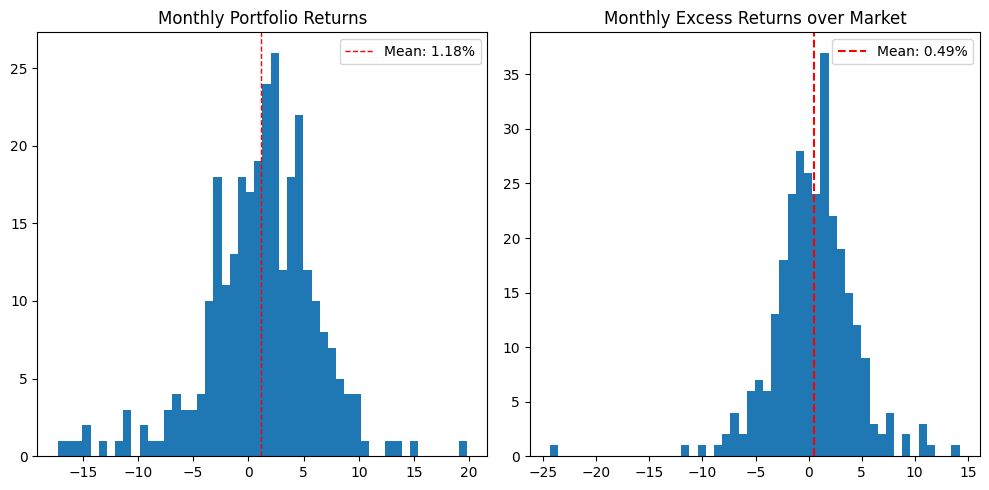

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(portfolio_returns, bins=50)
ax[0].axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}%')
ax[0].legend()
ax[0].set_title('Monthly Portfolio Returns')

ax[1].hist(excess_returns, bins=50)
ax[1].axvline(excess_mean, color='red', linestyle='dashed', label=f'Mean: {excess_mean:.2f}%')
ax[1].legend()
ax[1].set_title('Monthly Excess Returns over Market')

fig.tight_layout()
fig.show()

In [8]:
annualized_return = ((1+mean/100)**12 - 1) * 100

In [9]:
# initial investment
initial_investment = 100000
market_value = initial_investment * np.cumprod(1 + market_returns/100)[-1]
portfolio_value = initial_investment * np.cumprod(1 + portfolio_returns/100)[-1]

average_market_return = gmean(1 + market_returns/100) - 1
average_portfolio_return = gmean(1 + portfolio_returns/100) - 1

annual_market_return = ((1+average_market_return)**12 - 1) * 100
annual_portfolio_return = ((1+average_portfolio_return)**12 - 1) * 100

In [10]:
print(f'investment value of holding index fund: ${market_value:.2f}')
print(f'growth: {100*market_value/initial_investment:.2f}%')
print(f'annualized return: {annual_market_return:.2f}%')
print()

print(f'investment value of using Investment Strategy: ${portfolio_value:.2f}')
print(f'growth: {100*portfolio_value/initial_investment:.2f}%')
print(f'annualized return: {annual_portfolio_return:.2f}%')

investment value of holding index fund: $577652.81
growth: 577.65%
annualized return: 7.42%

investment value of using Investment Strategy: $2192893.94
growth: 2192.89%
annualized return: 13.43%


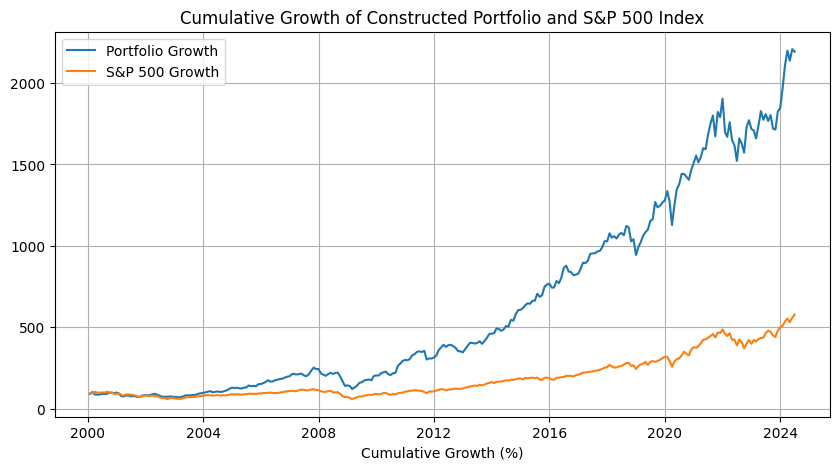

In [33]:
# plot cumulative returns
plt.figure(figsize=(10, 5))
plt.plot(test_dates[1:], 100*np.cumprod(1 + portfolio_returns/100), label='Portfolio Growth')
plt.plot(test_dates[1:], 100*np.cumprod(1 + market_returns/100), label='S&P 500 Growth')
plt.xlabel('Date')
plt.xlabel('Cumulative Growth (%)')
plt.title('Cumulative Growth of Constructed Portfolio and S&P 500 Index')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# test whether starting point matters for returns
# ie check variance of monthly returns